# Recommendation System using Amazon Reviews: Kavitha Chetana Didugu

### Note: I had tried to reduce data by choosing only those users who have rated atleast 50 products, but even with that dataset I faced a memory issue. Hence I have reduced the dataset even further by only choosing those users who have rated at least 100 products.

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import csv

In [129]:
from surprise import *

#### Importing Dataset

In [130]:
Data=pd.read_csv("ratings_Electronics.csv", names=["uid","iid","rating","timestamp"])

In [131]:
Data.head()

,uid,iid,rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [132]:
reader = Reader(rating_scale=(1, 5))

In [133]:
Data.head()

,uid,iid,rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [134]:
#Time stamp seems irrelevant for the curent project goal, hence dropping it
Data1=Data.drop('timestamp',axis=1)
Data1.head()

,uid,iid,rating
0,AKM1MP6P0OYPR,0132793040,5.0
1,A2CX7LUOHB2NDG,0321732944,5.0
2,A2NWSAGRHCP8N5,0439886341,1.0
3,A2WNBOD3WNDNKT,0439886341,3.0
4,A1GI0U4ZRJA8WN,0439886341,1.0


In [135]:
Data1.groupby('iid')['rating'].mean().head()  

iid
0132793040    5.000000
0321732944    5.000000
0439886341    1.666667
0511189877    4.500000
0528881469    2.851852
Name: rating, dtype: float64

In [136]:
Data1.groupby('uid')['rating'].mean().head()  

uid
A00000262KYZUE4J55XGL    5.0
A000063614T1OE0BUSKUT    5.0
A00009182QVLSWIGHLS1B    5.0
A00009661LC9LQPGKJ24G    5.0
A00010809P09NUU6ZP6H     5.0
Name: rating, dtype: float64

### Checking for null data

In [137]:
Data1.isnull().sum()

uid       0
iid       0
rating    0
dtype: int64

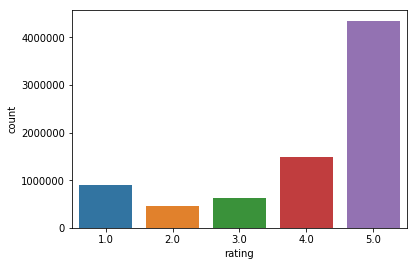

In [138]:
sns.countplot(Data1['rating'])

#### Sorting userIDs by the number of rating given by the user

In [139]:
Data1['uid'].value_counts().sort_values(ascending=False)

A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
A1ODOGXEYECQQ8    380
A36K2N527TXXJN    314
A2AY4YUOX2N1BQ    311
AWPODHOB4GFWL     308
A25C2M3QF9G7OQ    296
ARBKYIVNYWK3C     296
A22CW0ZHY3NJH8    292
A3EXWV8FNSSFL6    282
A38RMU1Y5TDP9     282
A3LGT6UZL99IW1    279
A2NOW4U7W3F7RI    277
A23GFTVIETX7DS    270
A3PD8JD9L4WEII    266
A17BUUBOU0598B    261
A3AYSYSLHU26U9    257
A2XRMQA6PJ5ZJ8    253
A231WM2Z2JL0U3    252
A12DQZKRKTNF5E    252
A1UQBFCERIP7VJ    247
AGVWTYW0ULXHT     244
A203OCQQ12MAVT    240
AEJAGHLC675A7     239
A2NYK9KWFMJV4Y    238
A3A4ZAIBQWKOZS    236
A3CW0ZLUO5X2B1    227
                 ... 
A3JD5TKGT9K1J9      1
AULL80LVV9Q0        1
A1HHHPEDCUK06E      1
ADP3531IWIBBE       1
A1DT0MFG3RPTH4      1
A39BN20RG2XJQG      1
A2APJYVHBNU5JS      1
A2J1JFAX6S84VT      1
A1P84CKFHXYI5U      1
A3OXDD5PAE4Y65      1
ASNBQ4BS4XHW6       1
APDX1GFA42FLA       1
A1P3GTOK5N3DRI      1
A38LSOTYQ4CFM5      1
A2ZH6ZOEI5

### Reducing Dataset by filtering out those users who have rated less than 100 products

In [140]:
Datasort1=[x for x in Data1['uid'].value_counts().sort_values(ascending=False) if x>=100]

In [141]:
len(Datasort1)

#There are 289 such users

289

In [142]:
sorted_users1=Data1['uid'].value_counts().sort_values(ascending=False)

In [143]:
sorted_users1=sorted_users1[:289]

In [144]:
sorted_users1

A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
A1ODOGXEYECQQ8    380
A36K2N527TXXJN    314
A2AY4YUOX2N1BQ    311
AWPODHOB4GFWL     308
A25C2M3QF9G7OQ    296
ARBKYIVNYWK3C     296
A22CW0ZHY3NJH8    292
A3EXWV8FNSSFL6    282
A38RMU1Y5TDP9     282
A3LGT6UZL99IW1    279
A2NOW4U7W3F7RI    277
A23GFTVIETX7DS    270
A3PD8JD9L4WEII    266
A17BUUBOU0598B    261
A3AYSYSLHU26U9    257
A2XRMQA6PJ5ZJ8    253
A231WM2Z2JL0U3    252
A12DQZKRKTNF5E    252
A1UQBFCERIP7VJ    247
AGVWTYW0ULXHT     244
A203OCQQ12MAVT    240
AEJAGHLC675A7     239
A2NYK9KWFMJV4Y    238
A3A4ZAIBQWKOZS    236
A3CW0ZLUO5X2B1    227
                 ... 
A3HR0ZZOFKQ97N    102
AX05DBU8IRUWY     102
A197T2N6RU7K56    102
A27H0T39U3FZB5    102
AHQRU3MRORIWQ     102
A16QODENBJVUI1    102
A14JBDSWKPKTZA    102
A3HPCRD9RX351S    102
A2LB4FLRZG6CUV    102
A2Y739CRM15WDL    101
A3DOPYDOS49I3T    101
A3S5EXYZDEBF3K    101
A2L42QEWR77PKZ    101
A3QMJMTLJC34QC    101
A1U4GOVZWL

In [145]:
Data3=Data1[Data1.uid.isin(sorted_users1.index)]

### EDA on Filtered/Reduced dataset

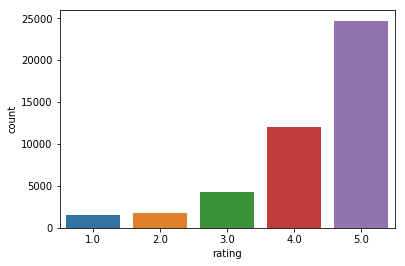

In [146]:
sns.countplot(Data3['rating'])

In [147]:
Data3.groupby('iid')['rating'].mean().head()  

iid
0594481813    3.0
0970407998    4.0
0972683275    5.0
1400501776    4.0
1400532655    2.0
Name: rating, dtype: float64

In [148]:
Data3.groupby('uid')['rating'].mean().head()  

uid
A100UD67AHFODS    4.508621
A100WO06OQR8BQ    3.651515
A10PEXB6XAQ5XF    4.028037
A10Y058K7B96C6    4.422764
A10ZFE6YE0UHW8    3.807692
Name: rating, dtype: float64

In [149]:
Data3.groupby('uid')['rating'].mean().sort_values(ascending=False)

uid
A18U49406IPPIJ    4.971698
A3D0UM4ZD2CMAW    4.964912
A25HBO5V8S8SEA    4.964072
A1E1LEVQ9VQNK     4.893401
A3DOPYDOS49I3T    4.891089
A27M75LRSJ788H    4.891089
A2VODABWSVHV8E    4.880734
A1XXMNLOLKNO0I    4.853211
A1G650TTTHEAL5    4.844660
ABDR6IJ93HFIO     4.842640
AKT8TGIT6VVZ5     4.833333
A34C9AFFZOI45T    4.821429
A2NYK9KWFMJV4Y    4.819328
ACJT8MUC0LRF0     4.811594
A1CMD08Z49PGKQ    4.809955
A25FL6VLD7S23S    4.801802
A2NOW4U7W3F7RI    4.797834
A17V9XL4CWTQ6G    4.789916
AYB4ELCS5AM8P     4.785714
AEJAGHLC675A7     4.769874
A2HRHF83I3NDGT    4.752000
A3S3R88HA0HZG3    4.744526
A2KYRPDKVBI2R4    4.726115
AWNJAY0M5UI70     4.722222
A31N0XY2UTB25C    4.718062
A3TAS1AG6FMBQW    4.717791
AZMY6E8B52L2T     4.714286
A1U4GOVZWL8ZTL    4.712871
A3HR0ZZOFKQ97N    4.705882
A2BYV7S1QP2YIG    4.705128
                    ...   
A213J54E63SYOP    3.802920
A1N5FSCYN4796F    3.801527
A3NOBH42C7UI5M    3.770000
A3W4D8XOGLWUN5    3.764706
A19X4BF861LQST    3.764151
A23NSKTMSPPBTR    3.7153

In [150]:
Data3.count()

uid       44209
iid       44209
rating    44209
dtype: int64

In [151]:
Data4=Dataset.load_from_df(Data3[['uid', 'iid', 'rating']], reader)

# Building Recommendation Systems

In [152]:
from surprise.model_selection import train_test_split

## Collaborative Filtering Models

In [153]:
from surprise import KNNWithMeans

#### Train Test Split on Filtered data where users have rated at least 100 products

In [154]:
trainset, testset = train_test_split(Data4, test_size=0.3)

### Item-Item Collaborative Filtering

In [155]:
sim_options1 = {
    'name': 'cosine',
    'user_based': False
}
knni = KNNWithMeans(sim_options=sim_options1)

#### Fitting Data on Dataset where user rated at least 100 products

In [156]:
knni.fit(trainset)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [157]:
predictions = knni.test(testset)

In [158]:
predictions

[Prediction(uid='A3L1VJMHFWONCB', iid='B008NCD2EI', r_ui=5.0, est=4.279099075809475, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A1UEL5C1N6E5SE', iid='B0091V7XVS', r_ui=5.0, est=4.279099075809475, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A1JZFGZEZVWQPY', iid='B00F0H88AC', r_ui=4.0, est=2.487804878048781, details={'actual_k': 1, 'was_impossible': False}),
 Prediction(uid='A3IY316DRNF5F2', iid='B000F31TI4', r_ui=5.0, est=4.875, details={'actual_k': 2, 'was_impossible': False}),
 Prediction(uid='A38KK0SZYEH5UD', iid='B0016XIQ1U', r_ui=5.0, est=4.279099075809475, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A2DG63DN704LOI', iid='B00HHRP11C', r_ui=5.0, est=5, details={'actual_k': 26, 'was_impossible': False}),
 Prediction(uid='AEJAGHLC675A7', iid='B00004RC2D', r_ui=5.0, est=5, details={'actual_k': 3, 'was_impossible': False}),
 Prediction(uid='

### User-User Collaborative Filtering 

In [160]:
sim_options = {
    'name': 'cosine',
    'user_based': True
}
 
knn1 = KNNWithMeans(sim_options=sim_options)

In [161]:
knn1.fit(trainset)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [162]:
predictions1=knn1.test(testset)

In [163]:
predictions1

[Prediction(uid='A3L1VJMHFWONCB', iid='B008NCD2EI', r_ui=5.0, est=4.279099075809475, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A1UEL5C1N6E5SE', iid='B0091V7XVS', r_ui=5.0, est=4.279099075809475, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A1JZFGZEZVWQPY', iid='B00F0H88AC', r_ui=4.0, est=5, details={'actual_k': 1, 'was_impossible': False}),
 Prediction(uid='A3IY316DRNF5F2', iid='B000F31TI4', r_ui=5.0, est=4.465867828612927, details={'actual_k': 1, 'was_impossible': False}),
 Prediction(uid='A38KK0SZYEH5UD', iid='B0016XIQ1U', r_ui=5.0, est=4.279099075809475, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A2DG63DN704LOI', iid='B00HHRP11C', r_ui=5.0, est=4.847953969799132, details={'actual_k': 8, 'was_impossible': False}),
 Prediction(uid='AEJAGHLC675A7', iid='B00004RC2D', r_ui=5.0, est=5, details={'actual_k': 2, 'was_impossible': False}),
 Predi

## Popularity Based Recommendation System: Matrix Factorization

In [164]:
from collections import defaultdict
from surprise import SVD
from surprise import accuracy

In [167]:
reader= Reader(rating_scale=(1.0, 5.0))

In [168]:
algo = SVD()

In [169]:
algo.fit(trainset)

In [170]:
predictions2=algo.test(testset)

In [171]:
predictions2

[Prediction(uid='A3L1VJMHFWONCB', iid='B008NCD2EI', r_ui=5.0, est=4.2249413867579415, details={'was_impossible': False}),
 Prediction(uid='A1UEL5C1N6E5SE', iid='B0091V7XVS', r_ui=5.0, est=4.05213427946361, details={'was_impossible': False}),
 Prediction(uid='A1JZFGZEZVWQPY', iid='B00F0H88AC', r_ui=4.0, est=4.278240449834671, details={'was_impossible': False}),
 Prediction(uid='A3IY316DRNF5F2', iid='B000F31TI4', r_ui=5.0, est=3.690098578954981, details={'was_impossible': False}),
 Prediction(uid='A38KK0SZYEH5UD', iid='B0016XIQ1U', r_ui=5.0, est=4.340442840539676, details={'was_impossible': False}),
 Prediction(uid='A2DG63DN704LOI', iid='B00HHRP11C', r_ui=5.0, est=4.434001853629644, details={'was_impossible': False}),
 Prediction(uid='AEJAGHLC675A7', iid='B00004RC2D', r_ui=5.0, est=4.96729986833133, details={'was_impossible': False}),
 Prediction(uid='A34C9AFFZOI45T', iid='B000XBMP5E', r_ui=4.0, est=4.737447316213633, details={'was_impossible': False}),
 Prediction(uid='A2UOHALGF2X77Q', 

## Error Comparison

#### Item-Item Based Recommendation System

In [172]:
accuracy.mae(predictions, verbose=True)

MAE:  0.7754


0.7754292367162107

In [173]:
accuracy.mse(predictions, verbose=True)

MSE: 1.1468


1.1468157689158802

In [174]:
accuracy.rmse(predictions, verbose=True)

RMSE: 1.0709


1.0708948449385123

In [175]:
accuracy.fcp(predictions, verbose=True)

FCP:  0.4897


0.48974584459564635

#### User-User Based Recommendation System

In [176]:
accuracy.mae(predictions1, verbose=True)

MAE:  0.7535


0.7534521400698199

In [177]:
accuracy.mse(predictions1, verbose=True)

MSE: 1.0674


1.06735519858137

In [178]:
accuracy.rmse(predictions1, verbose=True)

RMSE: 1.0331


1.0331288392941946

In [179]:
accuracy.fcp(predictions1, verbose=True)

FCP:  0.4854


0.48537775586514426

#### Popularity Based Recommendation System

In [180]:
accuracy.mae(predictions2, verbose=True)

MAE:  0.7123


0.7123461489736369

In [181]:
accuracy.mse(predictions2, verbose=True)

MSE: 0.9181


0.9180622745028411

In [182]:
accuracy.rmse(predictions2, verbose=True)

RMSE: 0.9582


0.9581556629811468

In [183]:
accuracy.fcp(predictions2, verbose=True)

FCP:  0.4817


0.48172389796199816

### Over all metrics, the SVD/Matrix Factorization based (popularity based) model fares better than the other models (similarity based models)

## Suggesting 5 new products to the customers

In [184]:
def get_top_n(predictions, n=5):
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

#### Suggestions based on Item-Item Collaborative Filtering

In [185]:
top_5i = get_top_n(predictions, n=5)

In [186]:
top_5i

defaultdict(list,
            {'A3L1VJMHFWONCB': [('B00006B81E', 5),
              ('B003BKW2K2', 5),
              ('B003ES5ZSW', 4.81038202727623),
              ('B00005T3G0', 4.686111111111111),
              ('B002N2EHVQ', 4.5)],
             'A1UEL5C1N6E5SE': [('B0000D8HK1', 5),
              ('B000089GN2', 5),
              ('B0007TJ5AK', 5),
              ('B0091V7XVS', 4.279099075809475),
              ('B000L43AEI', 4.279099075809475)],
             'A1JZFGZEZVWQPY': [('B0018QNYIK', 5),
              ('B00EWC0BQ0', 5),
              ('B00BWX2OU8', 4.919230769230769),
              ('B004L9M0B8', 4.279099075809475),
              ('B000FSVWWW', 4.279099075809475)],
             'A3IY316DRNF5F2': [('B0047E8DN6', 5),
              ('B000NDBRKG', 5),
              ('B006QR8W6K', 5),
              ('B0041D0K1Q', 5),
              ('B004XIT4NO', 5)],
             'A38KK0SZYEH5UD': [('B005LDLP8W', 5),
              ('B000P6M6HY', 5),
              ('B0080M3PCU', 5),
              ('

In [187]:
top_5i['A1VTCSCH8FFC76']

[('B008KWRTH2', 5),
 ('B00DB3SH2G', 5),
 ('B003HIXOOG', 5),
 ('B007KEZMX4', 5),
 ('B001KFH6IS', 5)]

#### Suggestions based on User-User Collaborative Filtering

In [188]:
top_5u = get_top_n(predictions1, n=5)

In [189]:
top_5u

defaultdict(list,
            {'A3L1VJMHFWONCB': [('B001MPWMDA', 5),
              ('B000HKGK8Y', 4.778151260504202),
              ('B00F6E4HXG', 4.730392156862745),
              ('B005CG2ATQ', 4.647940717334847),
              ('B003ES5ZSW', 4.603527023214406)],
             'A1UEL5C1N6E5SE': [('B000MW3YE0', 4.557093425605536),
              ('B000GK8LVE', 4.542526378743218),
              ('B0007TJ5AK', 4.494870041039672),
              ('B00746LVOM', 4.451228592702904),
              ('B0091V7XVS', 4.279099075809475)],
             'A1JZFGZEZVWQPY': [('B00F0H88AC', 5),
              ('B005WY3TD4', 5),
              ('B0009YDP7W', 5),
              ('B00BWX2OU8', 4.980041652204096),
              ('B00DB9WCR6', 4.564594247306514)],
             'A3IY316DRNF5F2': [('B0047E8DN6', 4.989807637094459),
              ('B004VM0SE6', 4.8627921461254795),
              ('B009TL1XS4', 4.803638726445744),
              ('B0041D0K1Q', 4.691358024691358),
              ('B005O81U9S', 4.61016057

In [190]:
top_5u['A1VTCSCH8FFC76']

[('B003ANN0D8', 5),
 ('B003D3NDCS', 4.8731030873888015),
 ('B007KEZMX4', 4.82620627141136),
 ('B00DB3SH2G', 4.752265278581068),
 ('B001D7REIK', 4.594098693715433)]

#### Suggestions based on Populatiry based system (SVD)

In [191]:
top_5s = get_top_n(predictions2, n=5)

In [192]:
top_5s

defaultdict(list,
            {'A3L1VJMHFWONCB': [('B003BKW2K2', 4.506118716541483),
              ('B003ES5ZSW', 4.49578304080631),
              ('B00006B81E', 4.414406303060079),
              ('B001MPWMDA', 4.413866337254521),
              ('B00005T3G0', 4.4053516915241495)],
             'A1UEL5C1N6E5SE': [('B00746LVOM', 4.419654926620016),
              ('B0007TJ5AK', 4.265894144497103),
              ('B000GK8LVE', 4.254678547152866),
              ('B0000D8HK1', 4.242566401674047),
              ('B000089GN2', 4.145196094137118)],
             'A1JZFGZEZVWQPY': [('B00EWC0BQ0', 4.3205902956488575),
              ('B00F0H88AC', 4.278240449834671),
              ('B00AR95FP4', 4.188688738272112),
              ('B0009YDP7W', 4.148229175767916),
              ('B000RLBWJK', 4.093885760817908)],
             'A3IY316DRNF5F2': [('B0041D0K1Q', 4.339896689863876),
              ('B001N0KEWU', 4.290291586257213),
              ('B0047E8DN6', 4.267147687706965),
              ('B0014ZAD

In [193]:
top_5s['A1VTCSCH8FFC76']

[('B001FWBUUG', 4.552806101246251),
 ('B000VW2QRM', 4.189953952750312),
 ('B002TLTGM6', 4.175005274007731),
 ('B001UGDMYY', 4.158543325448796),
 ('B003BYRMEO', 4.158427247421274)]

### Randomly chose a user (A1VTCSCH8FFC76) and explored the suggested products. suggested different products based on the descending order of product rating.

### This could be because of the difference in the calculation methods between the two classes of recommendation systems. 

### While the similarty based models could not determine the suggestions for a few users/products (was_impossible: True), the SVD model was able to determine them for all combinations (was_impossible: False).